#### Predicting Survival on the Titanic using Logistic Regression
#### A logistic regression classifier to predict survival on the titanic.
#### In this model i will uses the following independent variables to predict the dependent variable survived:
     1.Sex
     2.Age
     3.Passenger Class
     4.Number of Siblings/Spouses Aboard
     5.Number of Parents/Children Aboard


In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_frame = pd.read_csv("train.csv")

In [3]:
X = pd.DataFrame()
X['sex'] = data_frame['Sex']
X['age'] = data_frame['Age']
X['pclass'] = data_frame['Pclass']
X['sibsp'] = data_frame['SibSp']
X['parch'] = data_frame['Parch']
X['survived'] = data_frame['Survived']

In [4]:
# From above independent variable, only variable age contains Null Values 
# So,Replacing  Missing Values for variable age with Mean values
mage = X['age'].mean()
X['age'] = X['age'].fillna(mage)

In [5]:
#Survived will be my dependent variable, y.  
y = X['survived']

# Remove from x.
X = X.drop(['survived'], axis=1)

In [6]:
pd.get_dummies(X.sex)

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0


In [7]:
X['sex'] = pd.get_dummies(X.sex)['female']

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [9]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistical Model Creation


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [11]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Logistic Model Accuracy Analysis using AUC score

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [13]:
print "\n\n---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.81
             precision    recall  f1-score   support

          0       0.83      0.88      0.85       105
          1       0.81      0.74      0.77        74

avg / total       0.82      0.82      0.82       179



In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

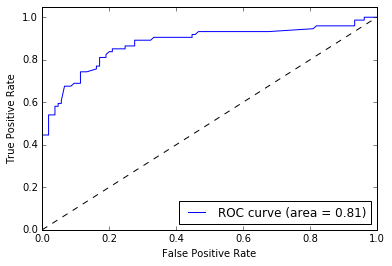

In [15]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#  The overall Logistic AUC of this model is 0.81